In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Task 1

In [79]:
df=pd.read_csv('diabetes.csv')
df.head(9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1


In [80]:
df.shape

(768, 9)

# Task 2

In [81]:
!pip install ydata-profiling

In [82]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Diabetes Profile Report")
profile.to_file("y_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 31.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [84]:
#Imputation
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [85]:
#Feature engineering

df_imputed['Body_Fat_Index'] = df_imputed['BMI'] * df_imputed['SkinThickness'] #creat new Body_Fat_Index column


df_imputed['Metabolic_Index'] = df_imputed['Glucose'] * df_imputed['Insulin'] #creat mew Metabolic_Index column

df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Body_Fat_Index,Metabolic_Index
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,1176.0,0.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,771.4,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,0.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,646.3,8366.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,1508.5,23016.0


In [86]:
#Binnig

# age 0 to 30 label as 0 , age 31 to 50 label as 1 , age 51 to 80 label as 2

bins = [20, 30, 50, 81]
labels = [0, 1, 2]


df_imputed['Age_Group'] = pd.cut(df_imputed['Age'], bins=bins, labels=labels)

#convert to intiger
df_imputed['Age_Group'] = df_imputed['Age_Group'].astype(int)

In [87]:
df_imputed.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Body_Fat_Index,Metabolic_Index,Age_Group
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,1176.0,0.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,771.4,0.0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,0.0,0.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,646.3,8366.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,1508.5,23016.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0,0.0,0.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,992.0,6864.0,0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0,0.0,0.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,1372.5,106971.0,2
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0,0.0,0.0,2


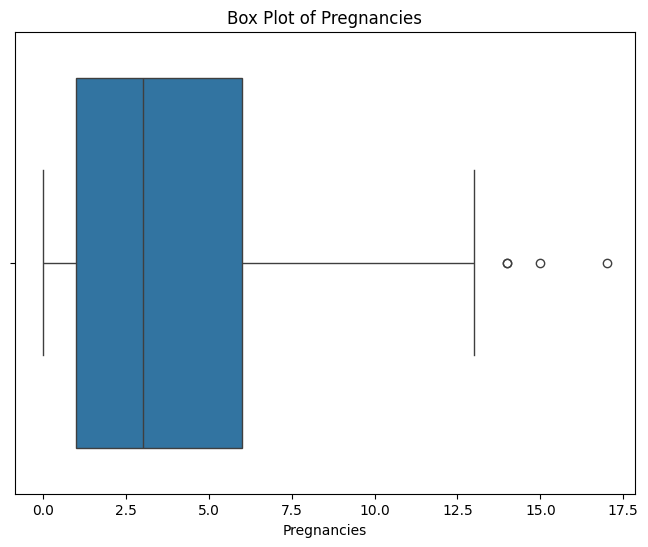

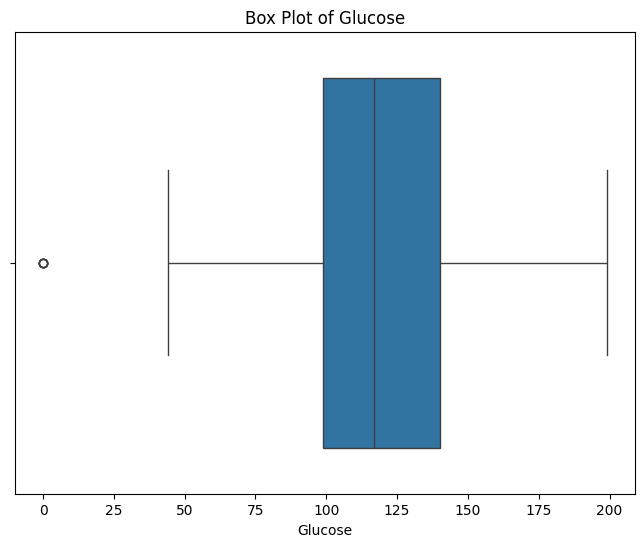

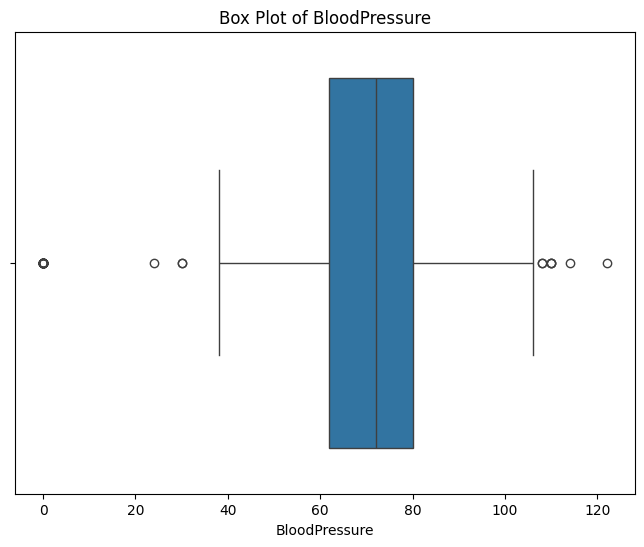

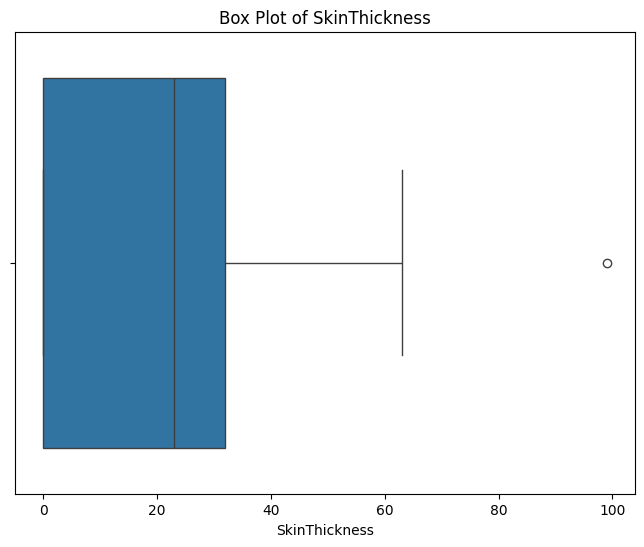

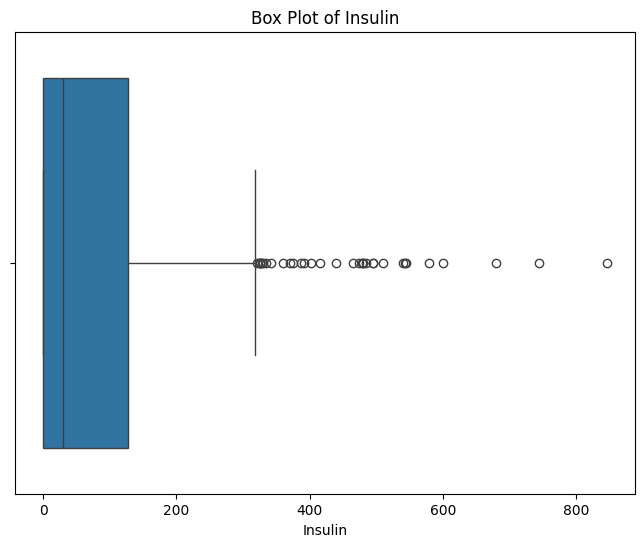

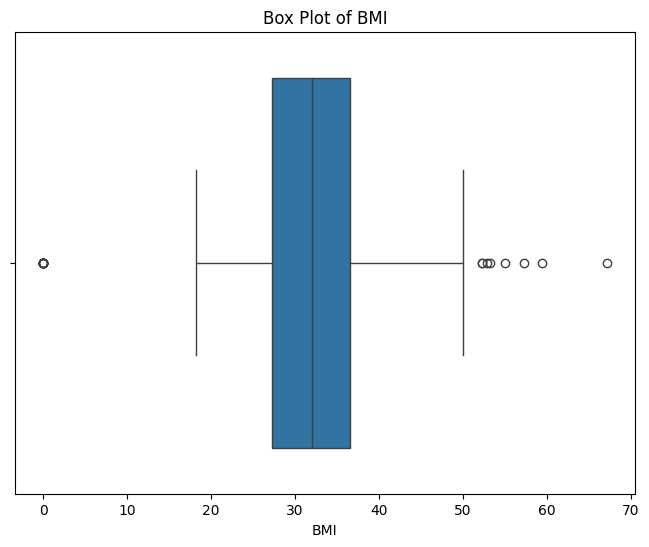

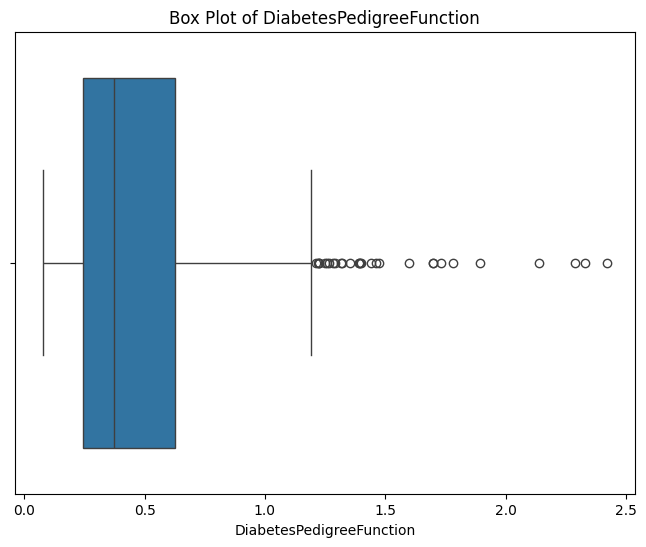

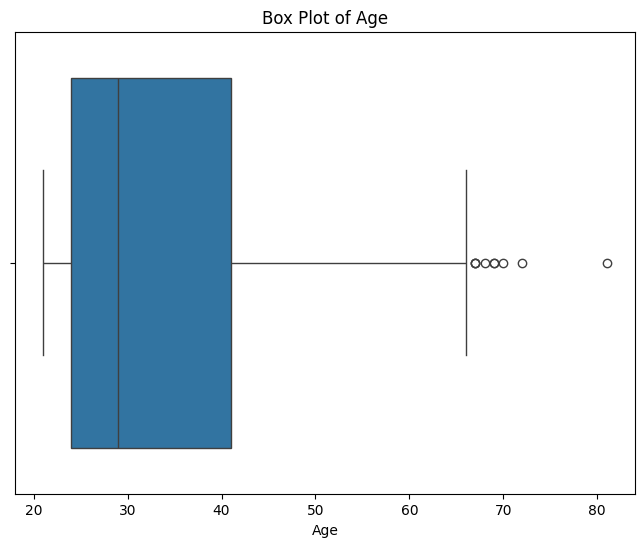

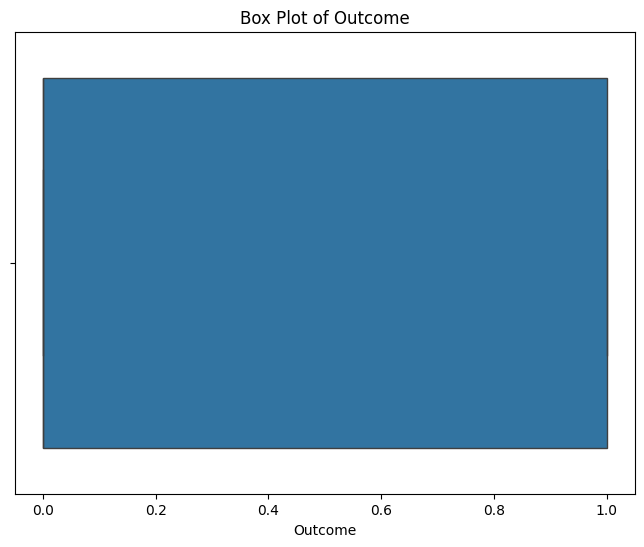

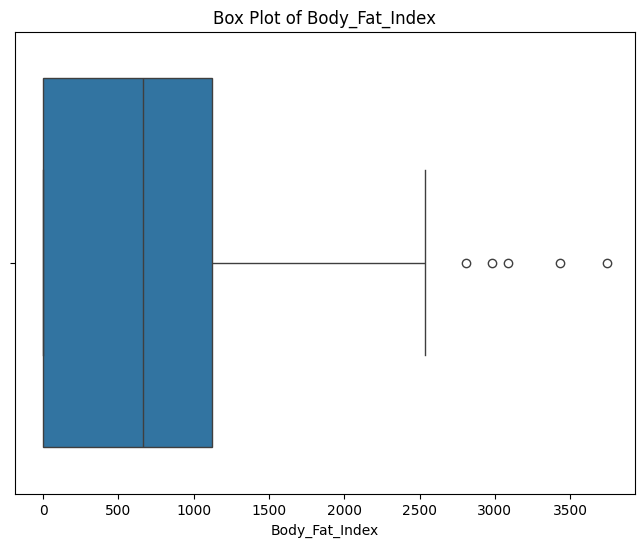

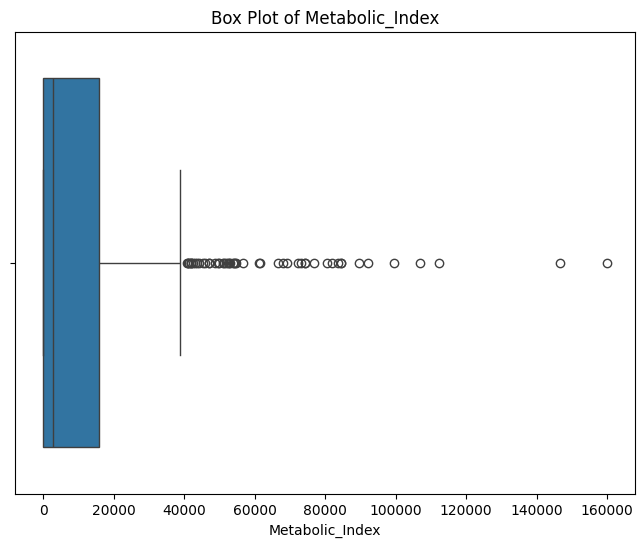

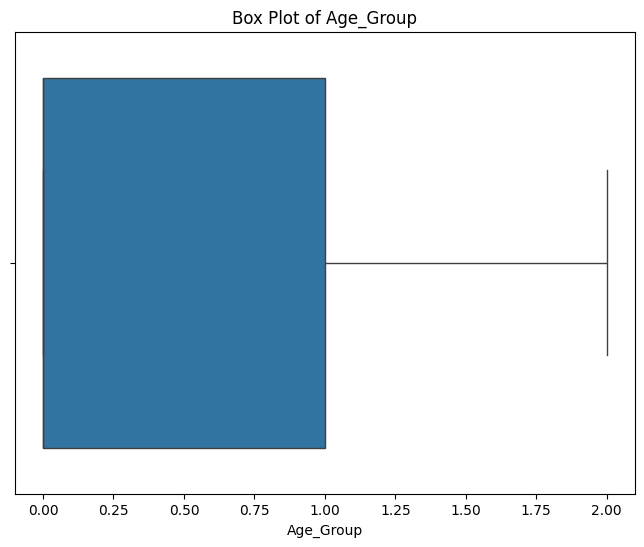

In [88]:
#box plot for all features
for col in df_imputed.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_imputed[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



In [89]:
#remove outlier
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_imputed[~((df_imputed < (Q1 - 1.5 * IQR)) |(df_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]

In [90]:
#correlation filtering

correlation = df_cleaned.corr()['Outcome'].sort_values(ascending=False)
print(correlation)

Outcome                     1.000000
Glucose                     0.484304
Age_Group                   0.277562
BMI                         0.276586
Age                         0.255450
Pregnancies                 0.216571
DiabetesPedigreeFunction    0.188424
BloodPressure               0.185215
Metabolic_Index             0.135991
Body_Fat_Index              0.072227
Insulin                     0.059242
SkinThickness               0.018582
Name: Outcome, dtype: float64


Class Distribution:
 Outcome
0.0    432
1.0    190
Name: count, dtype: int64


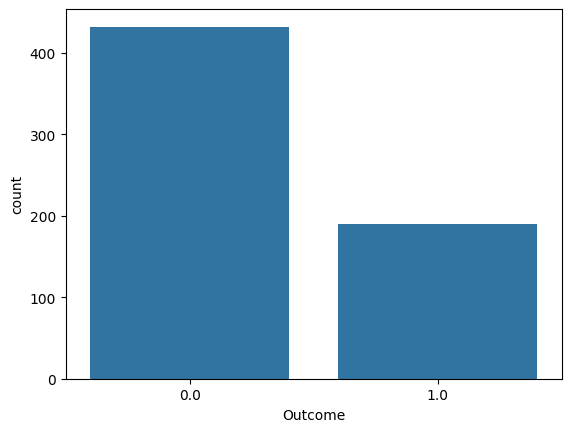

In [91]:
#class distribution
print("Class Distribution:\n", df_cleaned['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df_cleaned)
plt.show()

In [92]:

#select target and feature
X=df_cleaned.drop('Outcome', axis=1)
y=df_cleaned['Outcome']

X ,y


(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6.0    148.0           72.0           35.0      0.0  33.6   
 1            1.0     85.0           66.0           29.0      0.0  26.6   
 2            8.0    183.0           64.0            0.0      0.0  23.3   
 3            1.0     89.0           66.0           23.0     94.0  28.1   
 5            5.0    116.0           74.0            0.0      0.0  25.6   
 ..           ...      ...            ...            ...      ...   ...   
 763         10.0    101.0           76.0           48.0    180.0  32.9   
 764          2.0    122.0           70.0           27.0      0.0  36.8   
 765          5.0    121.0           72.0           23.0    112.0  26.2   
 766          1.0    126.0           60.0            0.0      0.0  30.1   
 767          1.0     93.0           70.0           31.0      0.0  30.4   
 
      DiabetesPedigreeFunction   Age  Body_Fat_Index  Metabolic_Index  \
 0                       

In [93]:
#split train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )

# Task 3,4,5

In [94]:
#pipeline
def get_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

In [95]:
#Dictionary of selected models
models={
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='linear',probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)

}

**Logistic Regression:** It is simple and fast, so I used as a baseline model.

**SVM:** It create boundary between classes, it works well on small but complex datasets.

**Random Forest:** It combines many decision trees, which reduce error and overfitting.

**Gradient Boosting:**  It learns from previous mistake step by step, making it bettet model for capture complex pattern

In [96]:
#training and evalution

result=[]
for model_name, model in models.items():
    pipeline = get_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    result.append([model_name, accuracy, precision, recall, f1])

result_df = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']).sort_values(by='F1 Score', ascending=False)
print(result_df)



                    Model  Accuracy  Precision    Recall  F1 Score
1  Support Vector Machine     0.832   0.793103  0.605263  0.686567
0     Logistic Regression     0.816   0.758621  0.578947  0.656716
2           Random Forest     0.808   0.733333  0.578947  0.647059
3       Gradient Boosting     0.768   0.636364  0.552632  0.591549


In [97]:
#best model name
best_model_name = result_df.iloc[0]['Model']
print(f"The best model is: {best_model_name}")

The best model is: Support Vector Machine


# Task 6

In [98]:

svc_pipeline = get_pipeline(SVC(kernel='linear',probability=True))





In [99]:
#5 fold cv
cv_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")

Cross-Validation Scores: [0.8        0.84       0.76       0.8        0.84       0.8
 0.78       0.69387755 0.75510204 0.73469388]


# Task 7

In [100]:
#grid search cv

param_grid = {
    'model__C':[0.1,1,10,100],
    'model__kernel':['linear','rbf'],
    'model__gamma':['scale','auto'],
}


In [101]:
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        SVC(kernel='linear',
                                            probability=True))]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [102]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Search Score: {grid_search.best_score_:.2f}")

Best Parameters: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Best Search Score: 0.78


# Task 8

In [103]:
#best model selection from gridsearch cv
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear', probability=True))])


# Task 9

In [104]:
#model performance
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89        87
         1.0       0.79      0.61      0.69        38

    accuracy                           0.83       125
   macro avg       0.82      0.77      0.79       125
weighted avg       0.83      0.83      0.82       125

[[81  6]
 [15 23]]
0.832
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89        87
         1.0       0.79      0.61      0.69        38

    accuracy                           0.83       125
   macro avg       0.82      0.77      0.79       125
weighted avg       0.83      0.83      0.82       125



In [105]:
#Svc model training again
svc_pipeline=get_pipeline(SVC(kernel='linear',C=0.1,probability=True))
svc_pipeline.fit(X_train, y_train)



Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear', probability=True))])

In [106]:
#model saving pickling
import pickle
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(svc_pipeline, file)